In [1]:
import pandas as pd

In [18]:
power_usage = pd.read_csv('power_usage.csv')
weather = pd.read_csv('weather_df.csv')

In [19]:
power_usage

,Unnamed: 0,year,month,usage
0,0,2016,1,753434128
1,1,2016,2,756942825
2,2,2016,3,714022910
3,3,2016,4,675078079
4,4,2016,5,630983018
...,...,...,...,...
79,79,2022,8,892014835
80,80,2022,9,806887743
81,81,2022,10,691579483
82,82,2022,11,690524525


In [20]:
weather = weather.drop(['Unnamed: 0'], axis=1)

In [21]:
weather

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [25]:
power_usage = power_usage.drop(['Unnamed: 0'], axis=1)

In [26]:
power_usage

,year,month,usage
0,2016,1,753434128
1,2016,2,756942825
2,2016,3,714022910
3,2016,4,675078079
4,2016,5,630983018
...,...,...,...
79,2022,8,892014835
80,2022,9,806887743
81,2022,10,691579483
82,2022,11,690524525


___날씨 변수 별 전력 사용량___

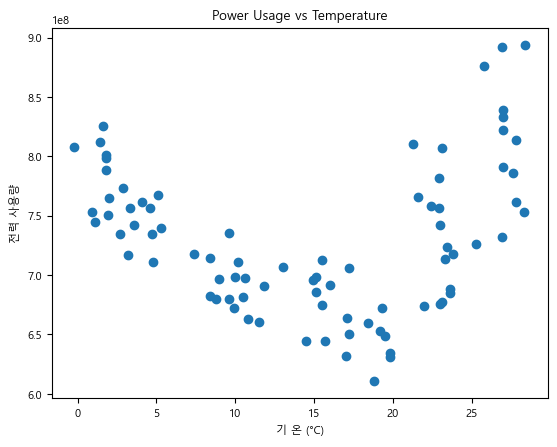

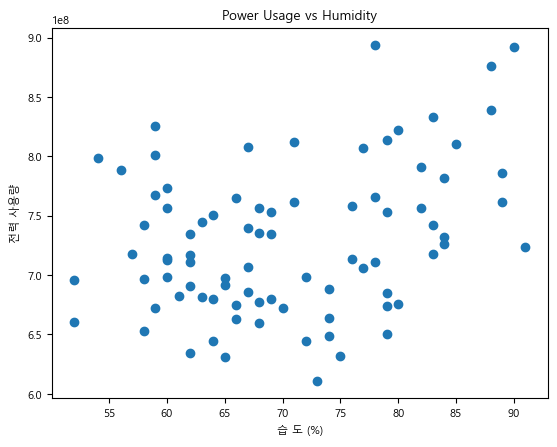

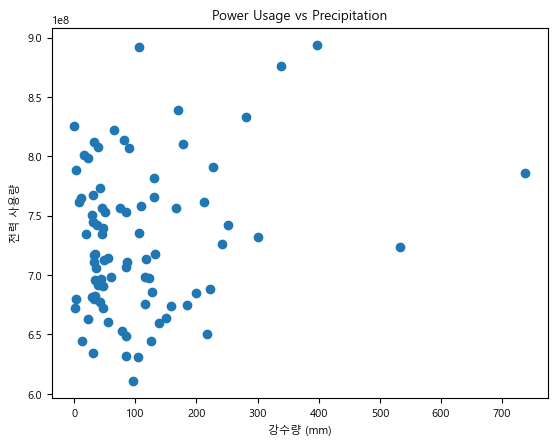

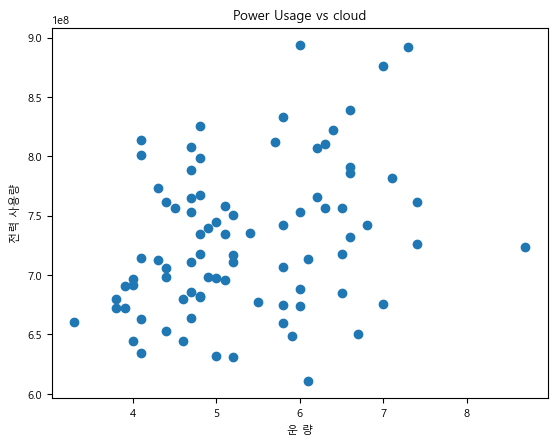

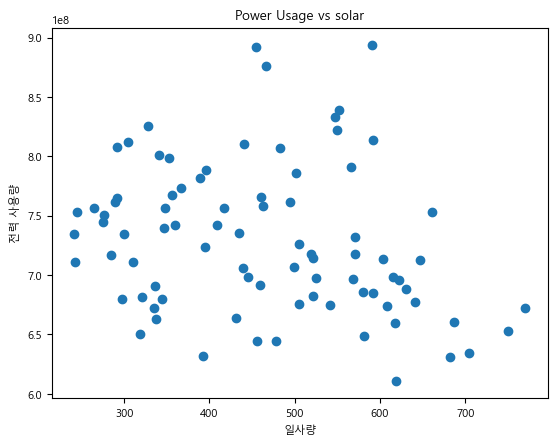

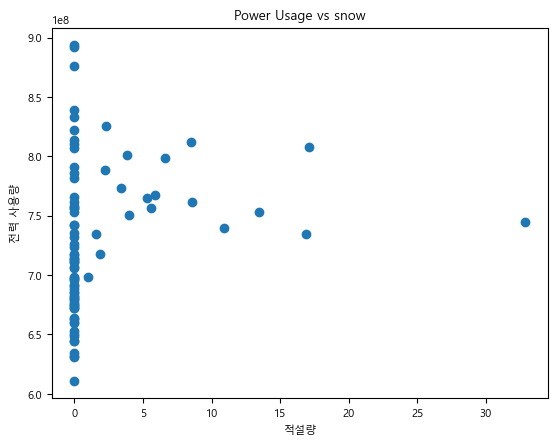

In [49]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)

power_usage_df = power_usage

weather_df = weather
# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)

# 기온, 사용량
plt.scatter(merged_df['temp'], merged_df['usage'])
plt.xlabel('기 온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()

# 습도, 사용량
plt.scatter(merged_df['Humidity_mean'], merged_df['usage'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(merged_df['rainfall_total'], merged_df['usage'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(merged_df['cloud'], merged_df['usage'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(merged_df['solar'], merged_df['usage'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# 적설량, 사용량
plt.scatter(merged_df['snow'], merged_df['usage'])
plt.xlabel('적설량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs snow')
plt.show()

___날씨 변수 시각화___

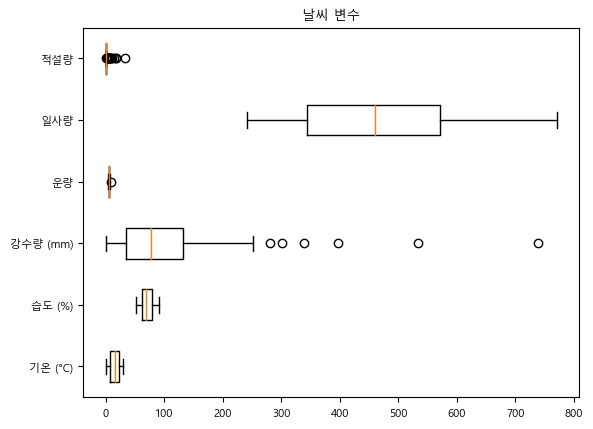

In [57]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)


power_usage_df = power_usage
weather_df = weather

# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)


data = [
    merged_df['temp'],
    merged_df['Humidity_mean'],
    merged_df['rainfall_total'],
    merged_df['cloud'],
    merged_df['solar'],
    merged_df['snow']
]


labels = [
    '기온 (°C)',
    '습도 (%)',
    '강수량 (mm)',
    '운량',
    '일사량',
    '적설량'
]


plt.boxplot(data, labels=labels, vert=False)
plt.xlabel('')
plt.title('날씨 변수')
plt.show()


___기온별 전력 사용량 막대 그래프___

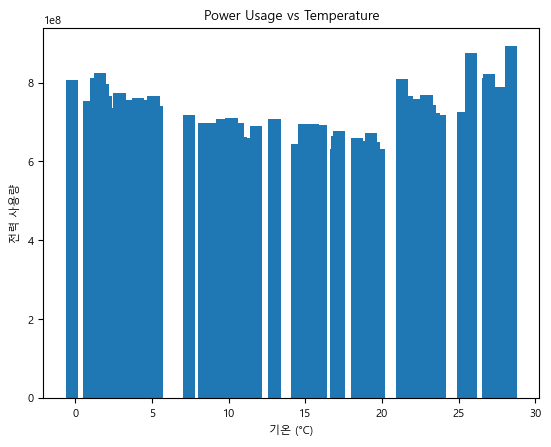

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)

# 'temp' 컬럼을 기준으로 그룹화하여 'usage' 컬럼의 평균값을 계산하고, 데이터프레임으로 변환
mean_power_usage_by_temp = merged_df.groupby(
    'temp')['usage'].mean().reset_index()

# 막대 그래프를 그리기 위해 'temp'와 'usage' 컬럼을 이용하여 그래프를 작성
plt.bar(mean_power_usage_by_temp['temp'], mean_power_usage_by_temp['usage'])

# x축 레이블 설정
plt.xlabel('기온 (°C)')

# y축 레이블 설정
plt.ylabel('전력 사용량')

# 그래프 제목 설정
plt.title('Power Usage vs Temperature')

# 그래프 출력
plt.show()


___사용량, 기온 선 그래프___

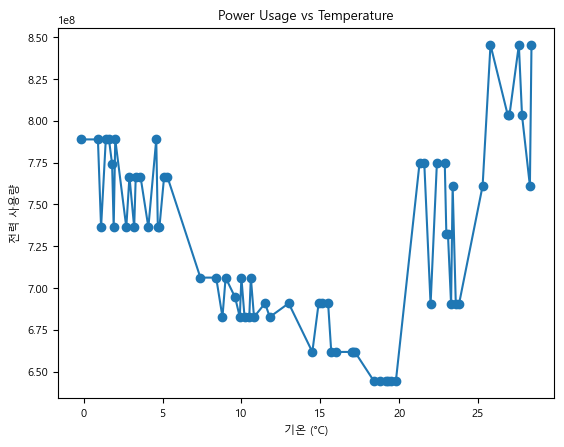

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)

merged_df = pd.merge(power_usage_df, weather_df, on='month')

mean_power_usage_by_temp = merged_df.groupby('temp')['usage'].mean().reset_index()

plt.plot(mean_power_usage_by_temp['temp'], mean_power_usage_by_temp['usage'], marker='o')
plt.xlabel('기온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()
